<h1 align=center><font size = 5>Finding a spot to open a pizza place in New York City</font></h1>

## Overview

The City of New York is a a very diverse and multicultural place, in almost every aspect of life. In this final project the focus will be on how to find a neighborhood to open a place to sell pizza. Doing so, and in order to maximize potential profits, five major aspects are considered: The spot I will chose should be in a neighborhood where
+ the surrounding neighborhoods are as homogenous as possible,
+ the surrounding neighborhoods have as little pizza places or Italian restaurants as possible,
+ the neighborhood itself and the surrounding neighborhoods are as densely populated as possible,
+ none of the top ten revenues is a pizza place and
+ none of the top ten revenues is an Italian restaurant.


### Workflow

To find a good solution to this problem, several steps must be taken: At first, a dataset containing information about each of New York's neighborhoods is loaded. Then each of the 5 NY boroughs (Manhattan, the Bronx, Queens, Brooklyn and Staten Island) is separated from this data set. Using the Foursquare API overall and for each borough and neighborhood the ten most common venues are generated. From this New York overall and each borough for itself is clustered (k-means clustering). From this clustering process the most homogenous area of New York is found. In order to then find the best place to sell pizza the data is reduced to all neighborhoods where none of the top ten venues is either a pizza place or an Italian restaurant.

The conclusions drawn in this project base on the given data set, map visualizations via Folium and histogram evaluations. This is by no means a complete study of the matter, in particular data to housing prices and population should also be considered to ensure a rational real-life choice.

### Libraries used

+ Pandas: For creating and manipulating dataframes
+ Numpy: For numerical computations
+ Folium: For interactive map visualizations
+ Scikit Learn: For importing k-means clustering
+ JSON: For JSON file handling
+ Geocoder: For location data retrieval
+ Requests: For http requests handling
+ Matplotlib: For plotting

At first, download and import all neccessary dependencies:

In [1]:
import numpy as np 
from urllib.request import urlopen
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.display import Image
import json 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

print('Libraries imported.')

Libraries imported.


## 1. Download, manipulate and visualize data

The data set I use contains a total of 5 boroughs and 306 neighborhoods, saved in a json file. For each neighborhood it also contains the geographical coordinates, both latitude and longitude.

In [2]:
#Loading data
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json"
json_url = urlopen(data_url)
newyork_data = json.loads(json_url.read())

In [3]:
#Save relevant data
neighborhoods_data = newyork_data['features']

In [4]:
# Define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# Instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [5]:
# Loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough, 'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat, 'Longitude': neighborhood_lon}, ignore_index=True)

In [6]:
# Use geopy library to get the latitude and longitude values of New York City
address    = 'New York City, NY'
geolocator = Nominatim(user_agent = "ny_explorer")
location   = geolocator.geocode(address)
latitude   = location.latitude
longitude  = location.longitude

In [7]:
#Define borough-specific data 
manhattan_data    = neighborhoods[neighborhoods['Borough'] == 'Manhattan'    ].reset_index(drop = True)
statenisland_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop = True)
brooklyn_data     = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'     ].reset_index(drop = True)
bronx_data        = neighborhoods[neighborhoods['Borough'] == 'Bronx'        ].reset_index(drop = True)
queens_data       = neighborhoods[neighborhoods['Borough'] == 'Queens'       ].reset_index(drop = True)

In [8]:
# Get the geographical coordinates of the 5 NY boroughs
address_manhattan    = 'Manhattan, NY'
address_statenisland = 'Staten Island, NY'
address_brooklyn     = 'Brooklyn, NY'
address_bronx        = 'Bronx, NY'
address_queens       = 'Queens, NY'

location_manhattan    = geolocator.geocode(address_manhattan)
location_statenisland = geolocator.geocode(address_statenisland)
location_brooklyn     = geolocator.geocode(address_brooklyn)
location_bronx        = geolocator.geocode(address_bronx)
location_queens       = geolocator.geocode(address_queens)

latitude_manhattan, longitude_manhattan       = location_manhattan.latitude, location_manhattan.longitude
latitude_statenisland, longitude_statenisland = location_statenisland.latitude, location_statenisland.longitude
latitude_brooklyn, longitude_brooklyn         = location_brooklyn.latitude, location_brooklyn.longitude
latitude_bronx, longitude_bronx               = location_bronx.latitude, location_bronx.longitude
latitude_queens, longitude_queens             = location_queens.latitude, location_queens.longitude

geolocator = Nominatim(user_agent="ny_explorer")

In [9]:
# Visualize all the neighborhoods of NY separately with different colors for each borough
map_NYall = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7,
        parse_html=False).add_to(map_NYall)  
for lat, lng, label in zip(statenisland_data['Latitude'], statenisland_data['Longitude'], statenisland_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker( [lat, lng], radius=5, popup=label, color='green', fill=True, fill_color='#0AAC00', fill_opacity=0.7,
        parse_html=False).add_to(map_NYall)  
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='red', fill=True, fill_color='#EB5559', fill_opacity=0.7,
        parse_html=False).add_to(map_NYall)  
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='yellow', fill=True, fill_color='#D9B300', fill_opacity=0.7,
        parse_html=False).add_to(map_NYall) 
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker( [lat, lng], radius=5, popup=label, color='orange', fill=True, fill_color='#FFD86C', fill_opacity=0.7,
        parse_html=False).add_to(map_NYall)  
    
map_NYall

## 2. Explore neighborhoods of New York

In order to make use of the Foursquare API we have to define several pieces of information, such as the client ID and the access token. Then for all neighborhoods in the data set the Foursquare API is used to collect data about nearby venues.

In [10]:
# Foursquare credentials
CLIENT_ID     = 'MM3HTQT2JE23FPCFUWL2GF3JQ51O43P24IHJRMEMWYLNTOOK'
CLIENT_SECRET = 'CSUSXGE2AARWBNW2JTDC5SI1MLMTMEWM3RT0GPYEQC4KH1RW'
ACCESS_TOKEN  = 'VMIM2AQ1TKXOYMJFETXKN3ZWLR0CSPFGFU0ZZRRAS2YA1132'
VERSION       = '20180604'
LIMIT         = 100

In [11]:
# Function to find the revenues in each neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)    
        # Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # Return only relevant information for each nearby venue
        venues_list.append([(
            name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 
                             'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [12]:
# Find venues for each borough separately and save data in new dataframes
ny_venues = getNearbyVenues(names = neighborhoods['Neighborhood'],
                                   latitudes = neighborhoods['Latitude'],
                                   longitudes = neighborhoods['Longitude'])

manhattan_venues = getNearbyVenues(names = manhattan_data['Neighborhood'],
                                   latitudes = manhattan_data['Latitude'],
                                   longitudes = manhattan_data['Longitude'])

bronx_venues = getNearbyVenues(names = bronx_data['Neighborhood'],
                                   latitudes = bronx_data['Latitude'],
                                   longitudes = bronx_data['Longitude'])

brooklyn_venues = getNearbyVenues(names = brooklyn_data['Neighborhood'],
                                   latitudes = brooklyn_data['Latitude'],
                                   longitudes = brooklyn_data['Longitude'])

statenisland_venues = getNearbyVenues(names = statenisland_data['Neighborhood'],
                                   latitudes = statenisland_data['Latitude'],
                                   longitudes = statenisland_data['Longitude'])

queens_venues = getNearbyVenues(names = queens_data['Neighborhood'],
                                   latitudes = queens_data['Latitude'],
                                   longitudes = queens_data['Longitude'])

## 3. Analyze each neighborhood


To get the most of the Foursquare data, the venue data is one hot encoded and stored in the corresponding data frames. Then the one hot encoded data is grouped by taking the mean of the frequency of occurrence of each venue category, finally the data is sorted by the number of venues in descending order.

In [13]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns_q = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns_q]

manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 
fixed_columns_mh = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns_mh]

statenisland_onehot = pd.get_dummies(statenisland_venues[['Venue Category']], prefix="", prefix_sep="")
statenisland_onehot['Neighborhood'] = statenisland_venues['Neighborhood'] 
fixed_columns_si = [statenisland_onehot.columns[-1]] + list(statenisland_onehot.columns[:-1])
statenisland_onehot = statenisland_onehot[fixed_columns_si]

brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 
fixed_columns_b = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns_b]

bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 
fixed_columns_br = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns_br]

queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 
fixed_columns_q = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns_q]

In [14]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()

manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
statenisland_grouped = statenisland_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()

In [15]:
#Sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe        
neighborhoods_ny_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_ny_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']
for ind in np.arange(ny_grouped.shape[0]):
    neighborhoods_ny_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)        
        
neighborhoods_manhattan_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_manhattan_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']
for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_manhattan_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_statenisland_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_statenisland_venues_sorted['Neighborhood'] = statenisland_grouped['Neighborhood']
for ind in np.arange(statenisland_grouped.shape[0]):
    neighborhoods_statenisland_venues_sorted.iloc[ind, 1:] = return_most_common_venues(statenisland_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_brooklyn_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_brooklyn_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']
for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_brooklyn_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_bronx_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_bronx_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']
for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_bronx_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_queens_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_queens_venues_sorted['Neighborhood'] = queens_grouped['Neighborhood']
for ind in np.arange(queens_grouped.shape[0]):
    neighborhoods_queens_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)


<a id='item4'></a>


## 4. Clustering neighborhoods


Now perform the _k_-means clustering algorithm to cluster the borough into 5 clusters and NY overall into 10 clusters. Then create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [17]:
kclusters = 5 #number of clusters for each neighborhood

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)
statenisland_grouped_clustering = statenisland_grouped.drop('Neighborhood', 1)
brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)
bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)
queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_manhattan = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
kmeans_brooklyn = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)
kmeans_bronx = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)
kmeans_statenisland = KMeans(n_clusters=kclusters, random_state=0).fit(statenisland_grouped_clustering)
kmeans_queens = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)

In [18]:
kclusters_ny = 10 #number of cluster for NY overall
ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)
kmeans_ny = KMeans(n_clusters=kclusters_ny, random_state=0).fit(ny_grouped_clustering)

In [19]:
# add clustering labels
neighborhoods_ny_venues_sorted.insert(0, 'Cluster Labels', kmeans_ny.labels_)
ny_merged = neighborhoods
# merge data
ny_merged = ny_merged.join(neighborhoods_ny_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

neighborhoods_manhattan_venues_sorted.insert(0, 'Cluster Labels', kmeans_manhattan.labels_)
manhattan_merged = manhattan_data
manhattan_merged = manhattan_merged.join(neighborhoods_manhattan_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

neighborhoods_brooklyn_venues_sorted.insert(0, 'Cluster Labels', kmeans_brooklyn.labels_)
brooklyn_merged = brooklyn_data
brooklyn_merged = brooklyn_merged.join(neighborhoods_brooklyn_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

neighborhoods_bronx_venues_sorted.insert(0, 'Cluster Labels', kmeans_bronx.labels_)
bronx_merged = bronx_data
bronx_merged = bronx_merged.join(neighborhoods_bronx_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

neighborhoods_statenisland_venues_sorted.insert(0, 'Cluster Labels', kmeans_statenisland.labels_)
statenisland_merged = statenisland_data
statenisland_merged = statenisland_merged.join(neighborhoods_statenisland_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

neighborhoods_queens_venues_sorted.insert(0, 'Cluster Labels', kmeans_queens.labels_)
queens_merged = queens_data
queens_merged = queens_merged.join(neighborhoods_queens_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

## Visualize the clusters

At first the map of NY overall is visualized, then this is repeated for each borough separately. Four each borough a histogram is computed showing the distribution of clusters in one borough over several neighborhoods. With that the final conclusions are drawn.

### New York, overall

In [22]:
# Map for NY overall
ny_merged = ny_merged.dropna()
ny_merged = ny_merged.reset_index(drop=True)

# create map
map_clusters_ny = folium.Map(location=[ny_merged['Latitude'].mean(), ny_merged['Longitude'].mean()], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters_ny)
ys = [i + x + (i*x)**2 for i in range(kclusters_ny)]

colors_array_ny = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow_ny = [colors.rgb2hex(i) for i in colors_array_ny]

# add markers to the map
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label,color=rainbow_ny[int(cluster)-1], fill=True, 
                        fill_color=rainbow_ny[int(cluster)-1], fill_opacity=0.8).add_to(map_clusters_ny)
map_clusters_ny

### The Bronx

In [23]:
# The Bronx
ny_merged_bronx = ny_merged[ny_merged['Borough'] == 'Bronx']
ny_merged_bronx.reset_index(drop = True, inplace = True)

# create map
map_clusters_bronx = folium.Map(location=[ny_merged_bronx['Latitude'].mean(), ny_merged_bronx['Longitude'].mean()], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters_ny)
ys = [i + x + (i*x)**2 for i in range(kclusters_ny)]

colors_array_ny = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow_ny = [colors.rgb2hex(i) for i in colors_array_ny]

# add markers to the map
for lat, lon, poi, cluster in zip(ny_merged_bronx['Latitude'], ny_merged_bronx['Longitude'], ny_merged_bronx['Neighborhood'], ny_merged_bronx['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=12, popup=label, color=rainbow_ny[int(cluster)-1], fill=True,
                        fill_color=rainbow_ny[int(cluster)-1], fill_opacity=0.8).add_to(map_clusters_bronx)  
map_clusters_bronx

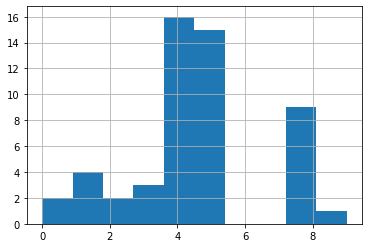

In [24]:
# Histogram of distribution of clusters in the Bronx
ny_merged_bronx['Cluster Labels'].hist()

### Manhattan

In [25]:
# Manhattan
ny_merged_manhattan = ny_merged[ny_merged['Borough'] == 'Manhattan']
ny_merged_manhattan.reset_index(drop = True, inplace = True)

# create map
map_clusters_manhattan = folium.Map(location=[ny_merged_manhattan['Latitude'].mean()+0.03, 
                                              ny_merged_manhattan['Longitude'].mean()], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_ny)
ys = [i + x + (i*x)**2 for i in range(kclusters_ny)]

colors_array_ny = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow_ny = [colors.rgb2hex(i) for i in colors_array_ny]

# add markers to the map
for lat, lon, poi, cluster in zip(ny_merged_manhattan['Latitude'], ny_merged_manhattan['Longitude'], ny_merged_manhattan['Neighborhood'], ny_merged_manhattan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=8, popup=label, color=rainbow_ny[int(cluster)-1], fill=True,
                        fill_color=rainbow_ny[int(cluster)-1], fill_opacity=0.8).add_to(map_clusters_manhattan)   
map_clusters_manhattan

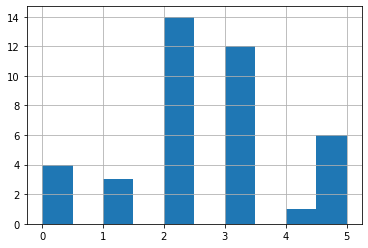

In [26]:
ny_merged_manhattan['Cluster Labels'].hist()

### Brooklyn

In [28]:
#Brooklyn
ny_merged_brooklyn = ny_merged[ny_merged['Borough'] == 'Brooklyn']
ny_merged_brooklyn.reset_index(drop = True, inplace = True)

# create map
map_clusters_brooklyn = folium.Map(location=[ny_merged_brooklyn['Latitude'].mean()-0.006, 
                                             ny_merged_brooklyn['Longitude'].mean()], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters_ny)
ys = [i + x + (i*x)**2 for i in range(kclusters_ny)]

colors_array_ny = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow_ny = [colors.rgb2hex(i) for i in colors_array_ny]

# add markers to the map
for lat, lon, poi, cluster in zip(ny_merged_brooklyn['Latitude'], ny_merged_brooklyn['Longitude'], ny_merged_brooklyn['Neighborhood'], ny_merged_brooklyn['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker( [lat, lon], radius=12, popup=label, color=rainbow_ny[int(cluster)-1], fill=True,
                         fill_color=rainbow_ny[int(cluster)-1], fill_opacity=0.8).add_to(map_clusters_brooklyn)
map_clusters_brooklyn

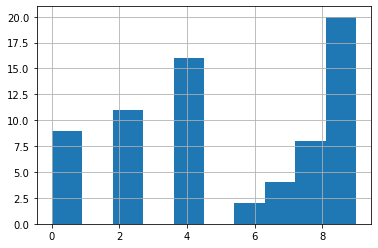

In [134]:
ny_merged_brooklyn['Cluster Labels'].hist()

### Staten Island

In [29]:
# Staten Island
ny_merged_statenisland = ny_merged[ny_merged['Borough'] == 'Staten Island']
ny_merged_statenisland.reset_index(drop = True, inplace = True)

# create map
map_clusters_statenisland = folium.Map(location=[ny_merged_statenisland['Latitude'].mean()-0.013, 
                                                 ny_merged_statenisland['Longitude'].mean()], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters_ny)
ys = [i + x + (i*x)**2 for i in range(kclusters_ny)]

colors_array_ny = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow_ny = [colors.rgb2hex(i) for i in colors_array_ny]

# add markers to the map
for lat, lon, poi, cluster in zip(ny_merged_statenisland['Latitude'], ny_merged_statenisland['Longitude'], 
                                  ny_merged_statenisland['Neighborhood'], ny_merged_statenisland['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker( [lat, lon], radius=12, popup=label, color=rainbow_ny[int(cluster)-1], fill=True, 
                         fill_color=rainbow_ny[int(cluster)-1], fill_opacity=0.8).add_to(map_clusters_statenisland)
map_clusters_statenisland

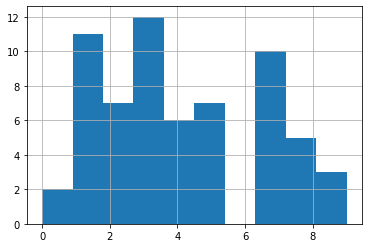

In [30]:
ny_merged_statenisland['Cluster Labels'].hist()

### Queens

In [31]:
#Queens
ny_merged_queens = ny_merged[ny_merged['Borough'] == 'Queens']
ny_merged_queens.reset_index(drop = True, inplace = True)

# create map
map_clusters_queens = folium.Map(location=[ny_merged_queens['Latitude'].mean()-0.03, 
                                           ny_merged_queens['Longitude'].mean()], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_ny)
ys = [i + x + (i*x)**2 for i in range(kclusters_ny)]

colors_array_ny = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow_ny = [colors.rgb2hex(i) for i in colors_array_ny]

# add markers to the map
for lat, lon, poi, cluster in zip(ny_merged_queens['Latitude'], ny_merged_queens['Longitude'], 
                                  ny_merged_queens['Neighborhood'], ny_merged_queens['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow_ny[int(cluster)-1],
        fill=True,
        fill_color=rainbow_ny[int(cluster)-1],
        fill_opacity=0.8).add_to(map_clusters_queens)
    
map_clusters_queens

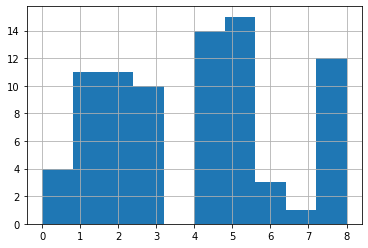

In [32]:
ny_merged_queens['Cluster Labels'].hist()

Overall, Manhattan is the most homogeneous borough, with Brooklyn and the Bronx being a close second and the other two being relatively equivalently inhomogeneous.

## 5. Neighborhoods without pizza places in top revenues

Now, of all neighborhoods drop those that have either a pizza place or an italian restaurant as one of their top ten most common venues and visualize the result.

In [35]:
ny_nopizza = ny_merged[(ny_merged['1st Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['1st Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['2nd Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['2nd Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['3rd Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['3rd Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['4th Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['4th Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['5th Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['5th Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['6th Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['6th Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['7th Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['7th Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['8th Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['8th Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['9th Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['9th Most Common Venue'] != 'Italian Restaurant') &
                       (ny_merged['10th Most Common Venue'] != 'Pizza Place') & 
                       (ny_merged['10th Most Common Venue'] != 'Italian Restaurant')
                      ]

In [38]:
ny_merged_nopizza = ny_nopizza
ny_merged_nopizza.reset_index(drop = True, inplace = True)

# create map
map_clusters_nopizza = folium.Map(location=[ny_merged_nopizza['Latitude'].mean(), ny_merged_nopizza['Longitude'].mean()], 
                                  zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters_ny)
ys = [i + x + (i*x)**2 for i in range(kclusters_ny)]

colors_array_ny = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow_ny = [colors.rgb2hex(i) for i in colors_array_ny]

# add markers to the map
for lat, lon, poi, cluster in zip(ny_merged_nopizza['Latitude'], ny_merged_nopizza['Longitude'], 
                                  ny_merged_nopizza['Neighborhood'], ny_merged_nopizza['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=7, popup=label, color=rainbow_ny[int(cluster)-1], fill=True,
                         fill_color=rainbow_ny[int(cluster)-1], fill_opacity=0.8).add_to(map_clusters_nopizza)
map_clusters_nopizza

<a id='item5'></a>


## 6. Conclusion

In the south of Manhattan there happens to be a rather homogenous cluster of neighborhoods without pizza places or Italian restaurants in the top 10 venues. 

Remark: The resulting clusters may vary (a little) since the Foursquare API results can change dynamically. Similarly, the cluster colours may appear a little differently.

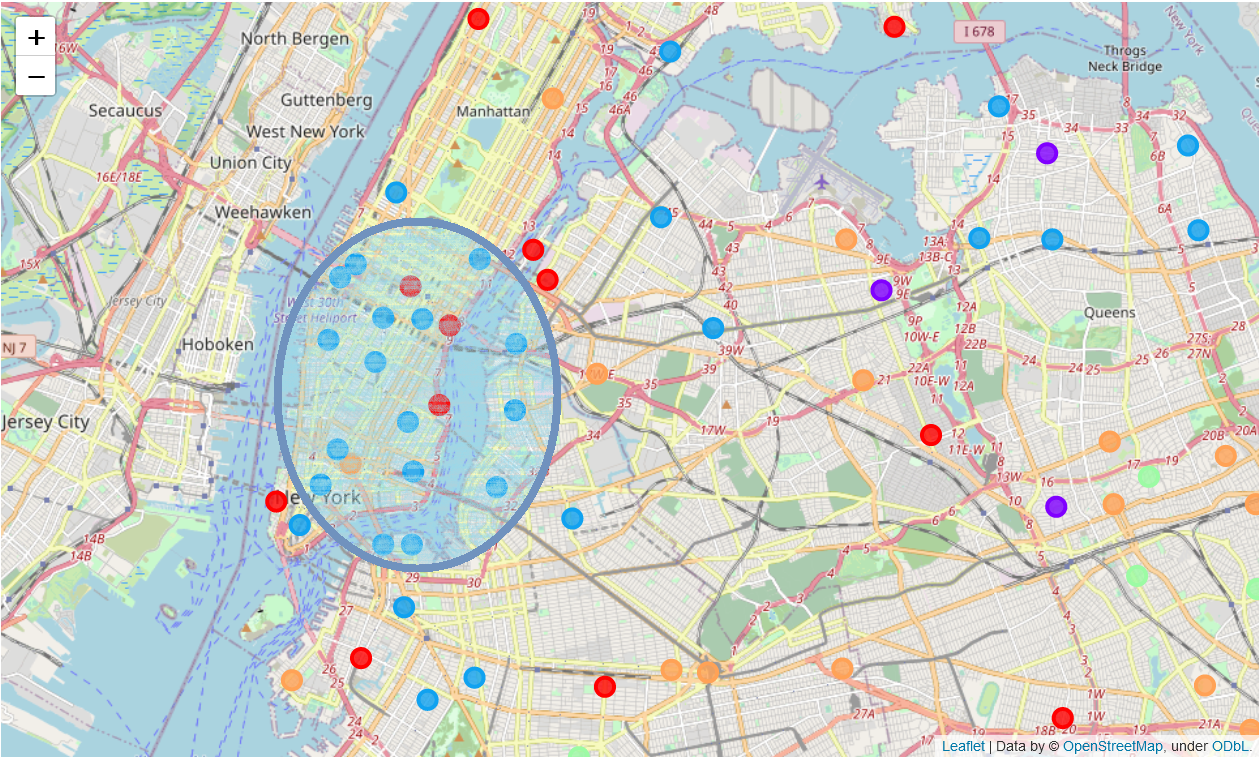

In [40]:
Image("overall.png")

Let's zoom in even further:

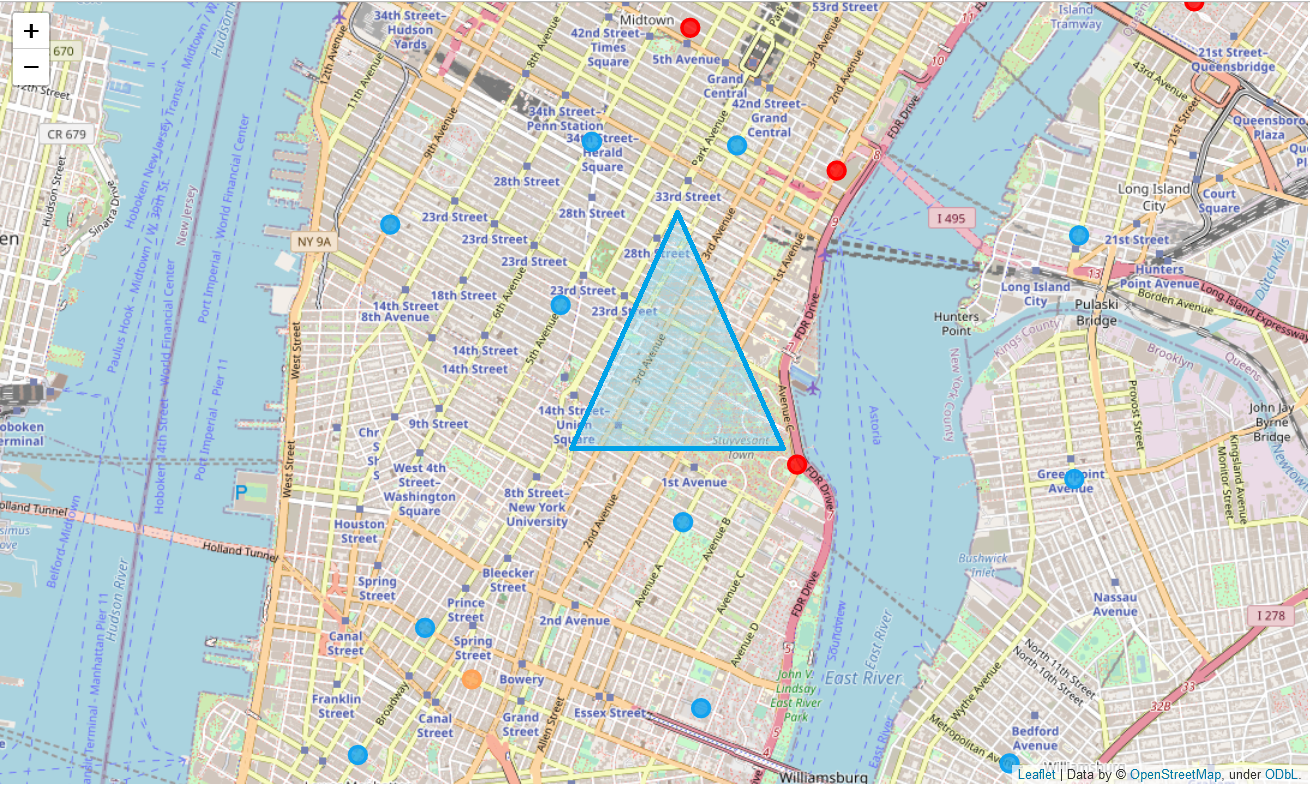

In [41]:
Image("overall_zoomed.png")

Thus, I'd finally recommend to __open a place to sell pizza in the south of Manhattan, near the 2nd Avenue and 23rd Street__. 
I am not familiar with the NY housing prices, but I guess Manhattan might be a rather expensive place to rent. However, this aspect needs deeper further consideration and is beyond the scope of this Notebook.